<a href="https://colab.research.google.com/github/pradul7/MASK_CNN/blob/main/DL_CNN_Mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os                         #helps working with directories,folders,files
from skimage.io import imread     # io = input/output
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D


In [ ]:
os.listdir('/content/drive/MyDrive/Mask_data/train')

['without_mask', 'with_mask']

In [ ]:
os.listdir('/content/drive/MyDrive/Mask_data/test')

['with_mask', 'without_mask']

Training data Preparation

In [ ]:
train_path = '/content/drive/MyDrive/Mask_data/train'
x_train = []
y_train = []

categories = ['without_mask','with_mask']    #instead of 'os.listdir'
for i in categories:
  folder_path = os.path.join(train_path,i)

  images = os.listdir(folder_path)
  for j in images:
    img_path = os.path.join(folder_path,j)

    img = imread(img_path)
    img_resize = resize(img,(150,150,3))
    x_train.append(img_resize)             # all resized images are added
    y_train.append(categories.index(i))    # 0 is added for without_mask and 1 is added for with_mask



Testing data Preparation

In [ ]:
test_path = '/content/drive/MyDrive/Mask_data/test'
x_test = []
y_test = []

categories = ['without_mask','with_mask']    #here we are not doing 'os.listdir' bcz then 0 will be assigned to with mask and vice versa in y_test
for i in categories:
  folder_path = os.path.join(test_path,i)

  images = os.listdir(folder_path)
  for j in images:
    img_path = os.path.join(folder_path,j)

    img = imread(img_path)
    img_resize = resize(img,(150,150,3))
    x_test.append(img_resize)
    y_test.append(categories.index(i))



converting training and testing from list to array

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

checking whether training and testing data are matching

In [ ]:
x_train.shape

(616, 150, 150, 3)

In [ ]:
y_train.shape

(616,)

In [ ]:
x_test.shape

(198, 150, 150, 3)

In [ ]:
y_test.shape

(198,)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(2, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, batch_size=32, epochs=15)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 524ms/step - accuracy: 0.5674 - loss: 1.2913
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 563ms/step - accuracy: 0.8216 - loss: 0.4582
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 561ms/step - accuracy: 0.9250 - loss: 0.2218
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 539ms/step - accuracy: 0.9240 - loss: 0.1916
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 579ms/step - accuracy: 0.9648 - loss: 0.0978
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 20s 540ms/step - accuracy: 0.9711 - loss: 0.0788
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 507ms/step - accuracy: 0.9671 - loss: 0.0906
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 568ms/step - accuracy: 0.9881 - loss: 0.0321
Epoch 9/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 503ms/step - accuracy: 0.9858 - loss: 0.0309
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 478ms/step - accuracy: 0.9963 - loss: 0.0158
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 568ms/step - accuracy: 0.9912 - loss: 0.0235
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 19

In [ ]:
model.evaluate(x_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 0.8522 - loss: 0.4936


[0.37096869945526123, 0.8838383555412292]

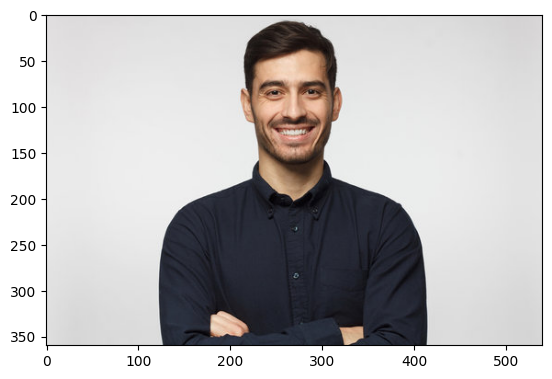

In [ ]:
img = imread('/content/without_mask.jpg')
plt.imshow(img)


In [ ]:
img.shape

(360, 540, 3)

In [ ]:
img = resize(img,(150,150,3)).reshape(1,150,150,3)     #bcz x_train.shape = (616, 150, 150, 3)
img.shape


(1, 150, 150, 3)

In [ ]:
y_new = model.predict(img)
y_new

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[0.7475315 , 0.25246862]], dtype=float32)

In [ ]:
ind = y_new.argmax()     #or 'np.argmax(y_new)'
print(categories[ind])

without_mask
